In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree

# Read and prepare file
data = pd.read_table('Titanic.csv', delimiter=',', header=0)
age_mean = data['age'].mean()
sibsp_mean = data['sibsp'].mean()
fare_mean = data['fare'].mean()

# Gender / Age / sibsp / fare / pclass
data.age = data.age.fillna(value=age_mean)
data.sibsp = data.sibsp.fillna(value=sibsp_mean)
data.fare = data.fare.fillna(value=fare_mean)
data_adj = data.drop(['num', 'name', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home_dest'], axis=1)

# Convert strings to discrete values
le = preprocessing.LabelEncoder()
le.fit(data_adj['pclass'])
data_adj['pclass'] = le.transform(data_adj['pclass'])
le.fit(data_adj['sex'])
data_adj['sex'] = le.transform(data_adj['sex'])

# Split Data 80:20 (Train:Test)
data_train, data_test = train_test_split(data_adj, test_size=0.2, random_state=42)

y = data_train.survived
x = data_train.drop(['survived'], axis=1)
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf = tree_clf.fit(x, y)


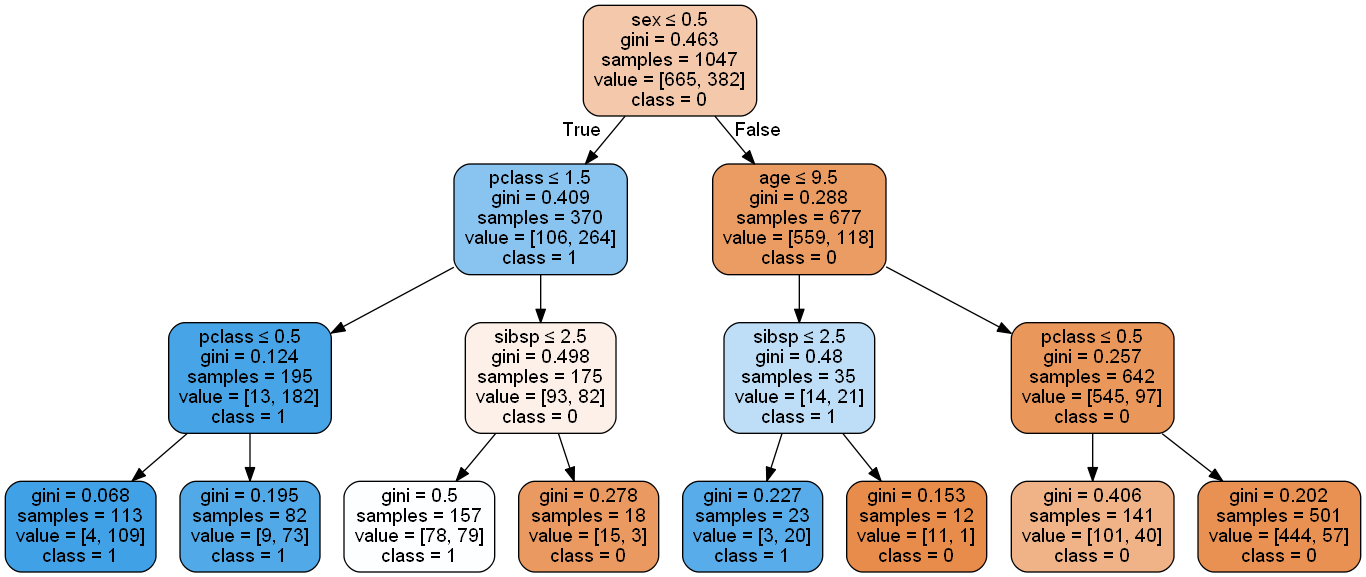

In [13]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['pclass', 'sex', 'age', 'sibsp'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [14]:
from sklearn.model_selection import GridSearchCV
param_dict = {'max_leaf_nodes' : list(range(2,100))}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_dict, verbose=1, n_jobs=-1, cv=3)
grid_search.fit(x, y)
grid_search.best_estimator_

Fitting 3 folds for each of 98 candidates, totalling 294 fits


DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)

In [15]:
from sklearn.metrics import recall_score
y_test = data_test.survived
x_test = data_test.drop(['survived'], axis=1)
y_pred = grid_search.predict(x_test)
# accuracy(% survivors correctly predicted)  TP/(TP + FN)
print(recall_score(y_test, y_pred, pos_label=1))

# accuracy(% fatalities correctly predicted)  TN/(TN + FP)
print(recall_score(y_test, y_pred, pos_label=0))


0.6101694915254238
0.8958333333333334


In [17]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=40, n_jobs=-1)
rnd_clf.fit(x, y)
y_pred_rf = rnd_clf.predict(x_test)

# accuracy(% survivors correctly predicted)   TP/(TP + FN)
print(recall_score(y_test, y_pred_rf, pos_label=1))

# accuracy(% fatalities correctly predicted)   TN/(TN + FP)
print(recall_score(y_test, y_pred_rf, pos_label=0))

0.576271186440678
0.9097222222222222
